### Fuzzy control logic

- experiment with very simple modeling to understand fuzzy control logic
- vertical pole balancing
- copy matlab example...

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


c:\Users\greyl\PyExplore\virtual_env\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


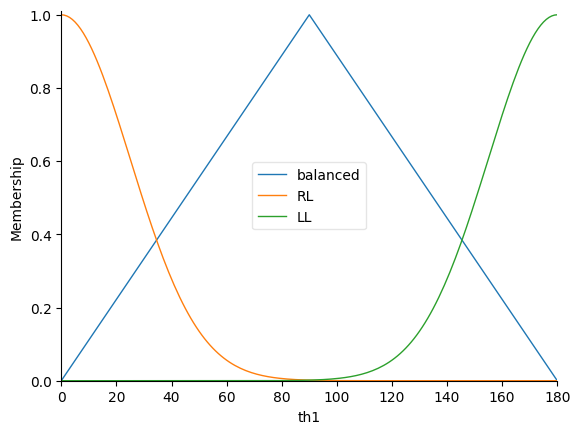

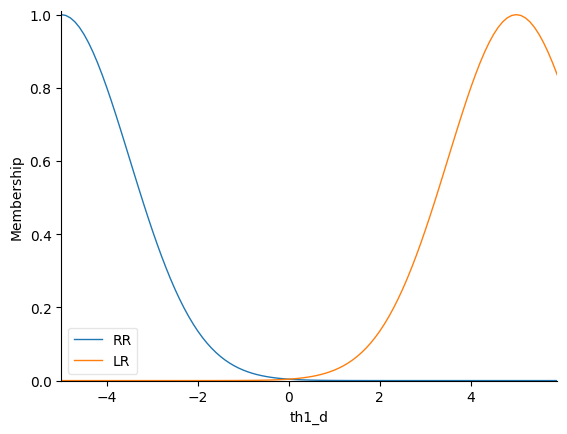

In [60]:
# membership function for theta
th1_range = np.arange(0, 181, 1)
th1 = ctrl.Antecedent(th1_range, 'th1')
th1_d_range = np.arange(-5, 6, .1)
th1_d = ctrl.Antecedent(th1_d_range, 'th1_d')


# Auto-membership function population is possible with .automf(3, 5, or 7)
th1['balanced'] = fuzz.trimf(th1_range, [0, 90, 180])
# theta leaning
th1['RL'] = fuzz.gaussmf(th1_range, 0, 25)# fuzz.sigmoid(th1_range, 180, 2)
th1['LL'] = fuzz.gaussmf(th1_range, 180, 25)

# theta rotation function
th1_d['RR'] = fuzz.gaussmf(th1_d_range, -5, 1.5)# fuzz.sigmoid(th1_range, 180, 2)
th1_d['LR'] = fuzz.gaussmf(th1_d_range, 5, 1.5)

th1.view()
th1_d.view()


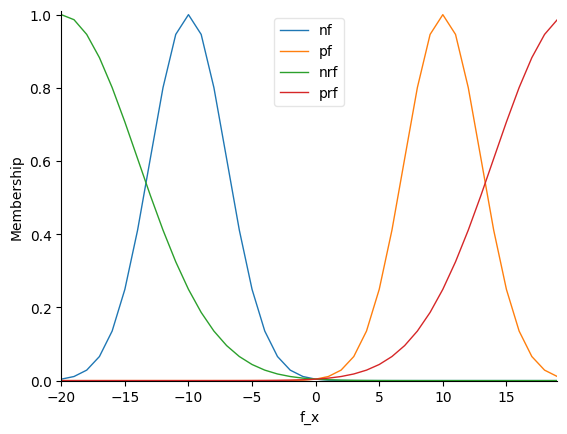

In [64]:
# membership function for stabilizing force
fx_range = np.arange(-20, 20, 1)
f_x = ctrl.Consequent(fx_range, 'f_x')
f_x['nf'] = fuzz.gaussmf(fx_range, -10, 3)
f_x['pf'] = fuzz.gaussmf(fx_range, 10, 3)

f_x['nrf'] = fuzz.gaussmf(fx_range, -20, 6)
f_x['prf'] = fuzz.gaussmf(fx_range, 20, 6)

f_x.view()


In [68]:
# creating rules...
rule1 = ctrl.Rule(th1['RL'], f_x['pf'])
rule2 = ctrl.Rule(th1['LL'], f_x['nf'])
rule3 = ctrl.Rule(th1_d['RR'], f_x['prf'])
rule4 = ctrl.Rule(th1_d['LR'], f_x['nrf'])
# rule3 = ctrl.Rule(a_y['n_unstable'] | a_y['p_unstable'], servo['horizontal'])
# rule4 = ctrl.Rule(a_x['n_waver'] | a_x['p_waver'], servo['slant'])
# rule5 = ctrl.Rule(a_y['n_waver'] | a_y['p_waver'], servo['slant'])
force_rules = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
force_control = ctrl.ControlSystemSimulation(force_rules)

# displaying rule views
# rule1.view()
# rule2.view()
# force_rules.view()


1.6029886310682588


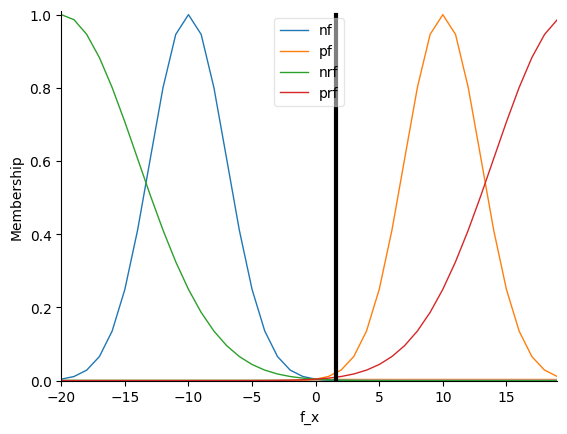

In [77]:
force_control.input['th1'] = 80
force_control.input['th1_d'] = 0
force_control.compute()

print(force_control.output['f_x'])
f_x.view(sim=force_control)